In [1]:
# Installing required packages
!pip install pandas matplotlib nltk textblob scikit-learn

In [2]:
# Importing necessary libraries
import os
import kagglehub
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter
import ast
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
from textblob import TextBlob
from collections import Counter, defaultdict
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

In [3]:
# Downloading latest version of the dataset
path = kagglehub.dataset_download("jaidityachopra/esg-sustainability-reports-of-s-and-p-500-companies")
print("Path to dataset files:", path)

100%|██████████| 23.8M/23.8M [00:00<00:00, 78.6MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/jaidityachopra/esg-sustainability-reports-of-s-and-p-500-companies/versions/2


In [4]:
# Listing all files in the downloaded directory
downloaded_path = path  # Using the path variable
files = os.listdir(downloaded_path)
print("Files in the downloaded directory:", files)

Files in the downloaded directory: ['preprocessed_content.csv']


In [7]:
# Loading the dataset
file_path = os.path.join(downloaded_path, "preprocessed_content.csv")
df = pd.read_csv(file_path)

In [8]:
# Displaying the first few rows of the data
display(df.head())

,Unnamed: 0,filename,ticker,year,preprocessed_content,ner_entities,e_score,s_score,g_score,total_score
0,0,ASX_BSX_2020.pdf,BSX,2020,style guide colour colour use imagecolour prof...,"['bk%', 'rgb', 'un', 'el ectric mine consortiu...",3.16,18.00,11.83,32.98
1,1,ASX_BSX_2022.pdf,BSX,2022,sustainability report look mining green office...,"['murray street', 'west perth', 'west perth', ...",2.83,12.86,10.32,26.02
2,2,ASX_EXR_2022.pdf,EXR,2022,report environment social governance esg basel...,"['september', 'mongolia', 'australia', 'austra...",3.81,4.28,5.86,13.94
3,3,LSE_ADM_2019.pdf,ADM,2019,corporate social responsibilty report introduc...,"['david stevens', 'csr board', 'just over yea...",16.38,14.20,5.90,36.36
4,4,LSE_ADM_2020.pdf,ADM,2020,sustainability admiral commit maintain respons...,"['year', 'health & wellbeing', 'a -month', 'on...",15.89,13.51,5.38,34.78


In [9]:
# Printing the total Rows and columns of the dataset
print("Total Rows:", df.shape[0])
print("Total Columns:", df.shape[1])

Total Rows: 866
Total Columns: 10


In [10]:
# Printing the information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 866 entries, 0 to 865
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            866 non-null    int64  
 1   filename              866 non-null    object 
 2   ticker                866 non-null    object 
 3   year                  866 non-null    int64  
 4   preprocessed_content  866 non-null    object 
 5   ner_entities          866 non-null    object 
 6   e_score               866 non-null    float64
 7   s_score               866 non-null    float64
 8   g_score               866 non-null    float64
 9   total_score           866 non-null    float64
dtypes: float64(4), int64(2), object(4)
memory usage: 67.8+ KB


In [11]:
# Checking for the missing values in the dataset
print(df.isnull().sum())

Unnamed: 0              0
filename                0
ticker                  0
year                    0
preprocessed_content    0
ner_entities            0
e_score                 0
s_score                 0
g_score                 0
total_score             0
dtype: int64


In [12]:
# Removing the unnamed 0 column
df = df.drop(columns=['Unnamed: 0'])

In [13]:
# Printing the summary statistics of the dataset
print(df.describe())

              year     e_score     s_score     g_score  total_score
count   866.000000  866.000000  866.000000  866.000000   866.000000
mean   2020.333718    5.904134   10.272229    7.423741    23.612240
std       1.292287    5.684071    4.013380    2.532303     7.574159
min    2014.000000    0.010000    1.280000    3.160000     6.990000
25%    2019.000000    1.662500    7.542500    5.622500    17.822500
50%    2020.000000    3.735000    9.855000    6.820000    22.710000
75%    2021.000000    9.027500   12.875000    8.640000    28.760000
max    2023.000000   24.840000   26.870000   16.470000    46.510000


In [14]:
# Printing the unique values and their frequencies for the 'filename', 'ticker', and 'year'
print("Unique values and counts for 'filename':")
print(df['filename'].value_counts())

print("\nUnique values and counts for 'ticker':")
print(df['ticker'].value_counts())

print("\nUnique values and counts for 'year':")
print(df['year'].value_counts())

Unique values and counts for 'filename':
filename
TSX_MSI_2019.pdf     1
ASX_BSX_2020.pdf     1
NYSE_YUM_2020.pdf    1
NYSE_YUM_2019.pdf    1
NYSE_XYL_2021.pdf    1
                    ..
LSE_BBY_2020.pdf     1
LSE_ADM_2021.pdf     1
LSE_ADM_2020.pdf     1
LSE_ADM_2019.pdf     1
ASX_EXR_2022.pdf     1
Name: count, Length: 866, dtype: int64

Unique values and counts for 'ticker':
ticker
ABT     5
CHTR    4
TXT     4
UDR     4
CINF    4
       ..
FAST    1
EXR     1
TFC     1
TDG     1
EFX     1
Name: count, Length: 263, dtype: int64

Unique values and counts for 'year':
year
2021    234
2020    219
2019    192
2022    154
2018     35
2023     19
2017      7
2016      4
2014      1
2015      1
Name: count, dtype: int64


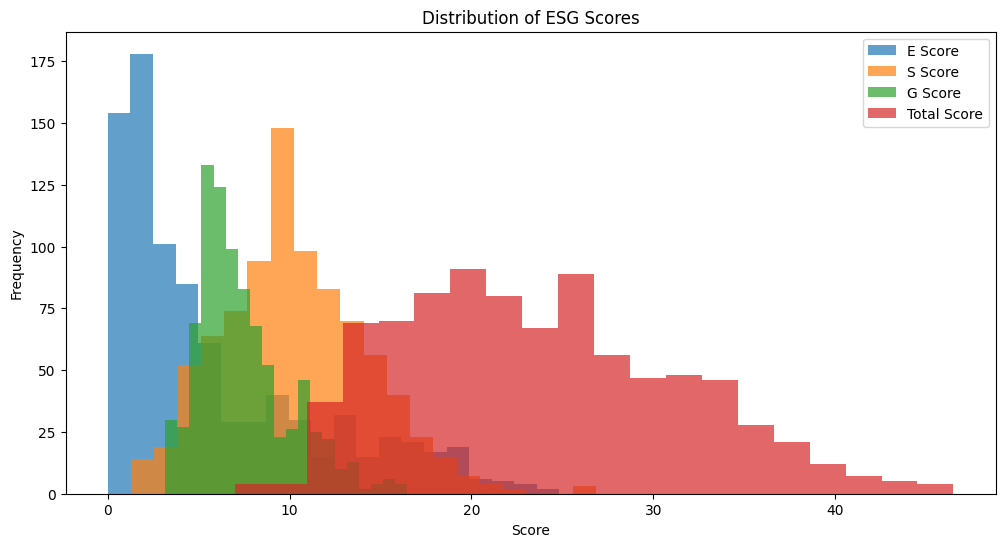

In [15]:
# Plotting the distribution of ESG scores
plt.figure(figsize=(12, 6))
plt.hist(df['e_score'], bins=20, alpha=0.7, label='E Score')
plt.hist(df['s_score'], bins=20, alpha=0.7, label='S Score')
plt.hist(df['g_score'], bins=20, alpha=0.7, label='G Score')
plt.hist(df['total_score'], bins=20, alpha=0.7, label='Total Score')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.title('Distribution of ESG Scores')
plt.legend()
plt.show()

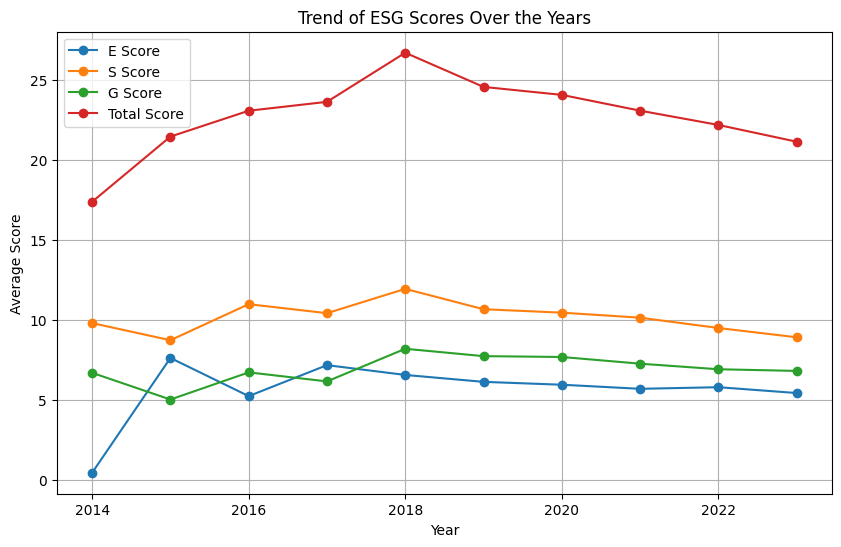

In [16]:
# Plotting the trend of ESG scores over the years
df_yearly = df.groupby('year')[['e_score', 's_score', 'g_score', 'total_score']].mean().reset_index()
plt.figure(figsize=(10, 6))
plt.plot(df_yearly['year'], df_yearly['e_score'], marker='o', label='E Score')
plt.plot(df_yearly['year'], df_yearly['s_score'], marker='o', label='S Score')
plt.plot(df_yearly['year'], df_yearly['g_score'], marker='o', label='G Score')
plt.plot(df_yearly['year'], df_yearly['total_score'], marker='o', label='Total Score')
plt.xlabel('Year')
plt.ylabel('Average Score')
plt.title('Trend of ESG Scores Over the Years')
plt.legend()
plt.grid(True)
plt.show()

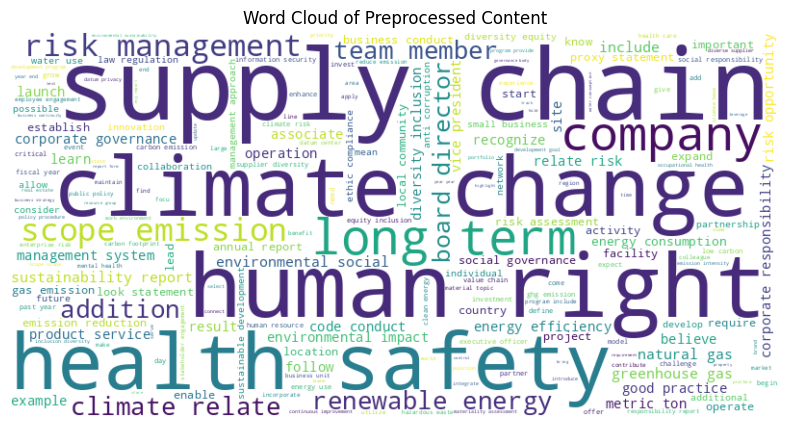

In [17]:
# Creating a word cloud for preprocessed_content
text = " ".join(df['preprocessed_content'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Preprocessed Content')
plt.show()

In [18]:
# Counting all the named entities in the ner_entities column
entity_counts = Counter()
for entities_list_str in df['ner_entities'].dropna():
    try:
        # Safely evaluating the string representation of the list
        entities_list = ast.literal_eval(entities_list_str)
        if isinstance(entities_list, list):
            for entity in entities_list:
                entity_counts[entity] += 1
    except (ValueError, SyntaxError):
        # Handling cases where the string is not a valid list representation
        print(f"Could not parse entity list: {entities_list_str}")
        continue

In [19]:
# Displaying the most common named entities
print("Most common named entities:")
for entity, count in entity_counts.most_common(20):
    print(f"{entity}: {count}")

Most common named entities:
u.s.: 20167
•: 20005
annual: 14822
first: 11114
one: 10591
third: 10146
two: 6255
zero: 5975
three: 5571
million: 5390
annually: 4536
four: 3751
the united states: 3743
december: 3459
hours: 3417
california: 3370
american: 3318
pg&e: 3241
today: 3128
the year: 3108


In [20]:
# Calculating the correlation matrix for the numerical columns
numerical_cols = ['e_score', 's_score', 'g_score', 'total_score']
correlation_matrix = df[numerical_cols].corr()

In [21]:
# Grouping by 'ticker' and calculating the mean of the ESG scores
ticker_scores = df.groupby('ticker')[numerical_cols].mean().reset_index()

In [22]:
# Sorting by average 'total_score' in descending order
top_10_tickers = ticker_scores.sort_values(by='total_score', ascending=False).head(10)

In [23]:
# Display the Top 10 Tickers by Average Total ESG Score
display(top_10_tickers)

,ticker,e_score,s_score,g_score,total_score
74,CTRA,23.420000,14.010000,9.070000,46.510000
91,EOG,22.786667,12.136667,8.183333,43.133333
76,CVX,19.837500,11.260000,10.200000,41.282500
236,TSN,14.295000,14.220000,12.735000,41.115000
185,PCG,7.872500,25.235000,7.757500,40.770000
197,PXD,20.495000,10.727500,9.097500,40.207500
94,EQT,20.873333,9.126667,8.386667,39.020000
225,TDG,12.840000,17.850000,8.290000,38.980000
24,APA,21.980000,8.880000,7.960000,38.810000
238,TXT,10.420000,19.252500,7.332500,37.195000


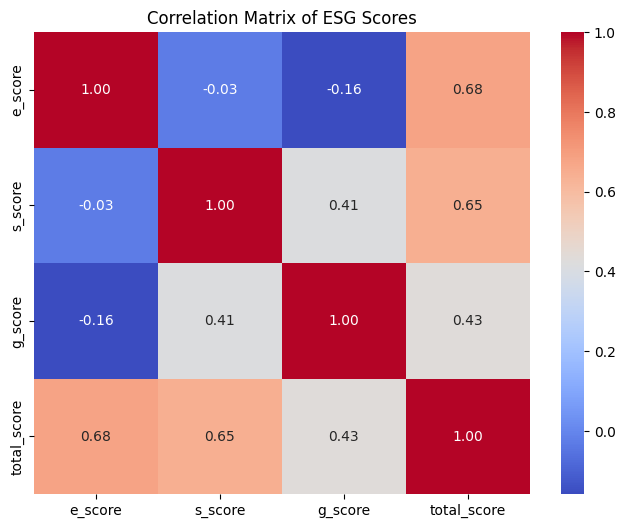

In [24]:
# Displaying the correlation matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of ESG Scores')
plt.show()

In [25]:
# Downloading required NLTK resources
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [26]:
# Initialising the Sentiment Analyzer
sia = SentimentIntensityAnalyzer()

In [27]:
# Defining a function to get sentiment
def analyze_sentiment(text):
    vader = sia.polarity_scores(str(text))
    blob = TextBlob(str(text))
    return pd.Series([
        vader['neg'], vader['neu'], vader['pos'], vader['compound'],
        blob.sentiment.polarity, blob.sentiment.subjectivity])

In [28]:
# Applying the sentiment to dataset
df[['vader_neg','vader_neu','vader_pos','vader_compound',
      'blob_polarity','blob_subjectivity']] = df['preprocessed_content'].apply(analyze_sentiment)

In [29]:
# Printing the updated data head
print(df[['ticker','year','vader_compound','blob_polarity']].head())

  ticker  year  vader_compound  blob_polarity
0    BSX  2020          1.0000       0.087000
1    BSX  2022          1.0000       0.098433
2    EXR  2022          0.9998       0.081596
3    ADM  2019          1.0000       0.107414
4    ADM  2020          1.0000       0.098531


In [30]:
# Vectorizing the text
vectorizer = CountVectorizer(max_df=0.5, min_df=5, stop_words='english')
dtm = vectorizer.fit_transform(df['preprocessed_content'].fillna(""))

In [31]:
# Fitting the LDA model
lda = LatentDirichletAllocation(n_components=10, random_state=42)
lda.fit(dtm)

LatentDirichletAllocation(random_state=42)

In [32]:
# Creating function for displaying the top words per topic
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print(f"Topic {topic_idx}: ", " ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))

In [33]:
# Displaying top words per topic
display_topics(lda, vectorizer.get_feature_names_out(), 10)

Topic 0:  client loan banking advisor medtronic fedex fifth baxter lending street
Topic 1:  methane traveler cummin oracle spill hydrogen transmission habitat reliability leak
Topic 2:  animal fmc tesla teammate autodesk tyson cadence truist microchip adobe
Topic 3:  patient clinical medicine ship trial apple cruise cancer drug diagnostic
Topic 4:  tion cbre ation cme oper liability synchrony resident residential isk
Topic 5:  berkley starbuck agent sce catastrophe underwriting wildfire paypal cancer fleet
Topic 6:  farmer animal ingredient cocoa farm nutrition palm welfare retail meal
Topic 7:  mining ppg tailing indigenous western schlumberger discharge biodiversity circular seagate
Topic 8:  fiscal mineral rba tower walgreen semiconductor boot cloud internet citizenship
Topic 9:  hotel resort restaurant resident guest tenant estate sand eam leed


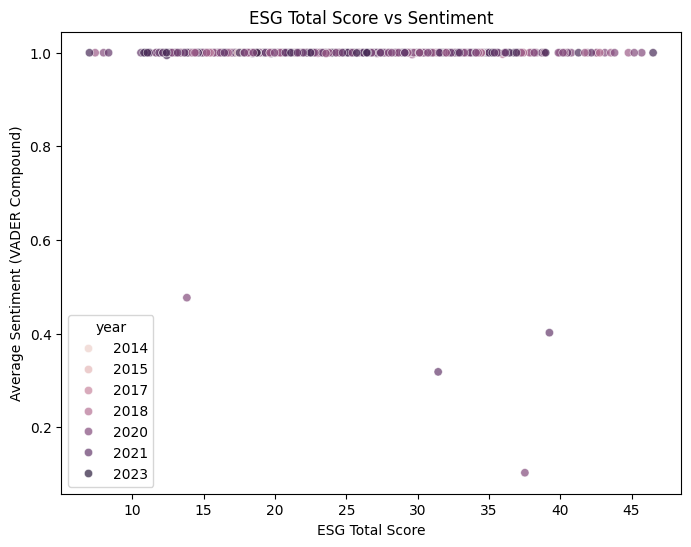

In [34]:
# Analysing the Average Sentiments
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x="total_score", y="vader_compound", hue="year", alpha=0.7)
plt.title("ESG Total Score vs Sentiment")
plt.xlabel("ESG Total Score")
plt.ylabel("Average Sentiment (VADER Compound)")
plt.show()

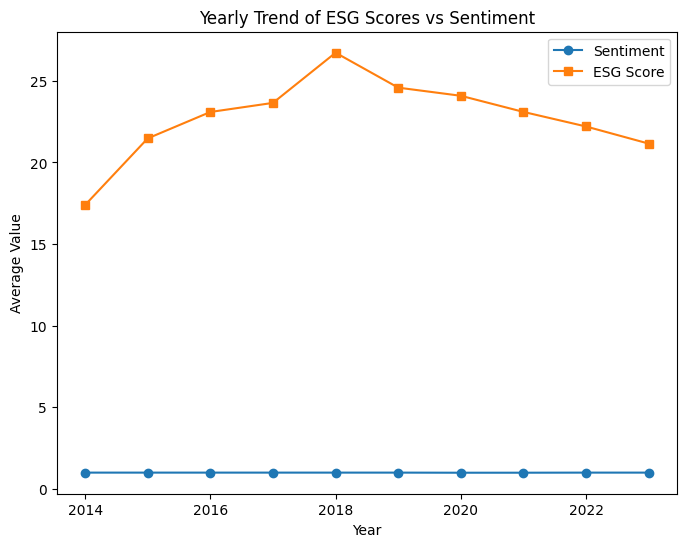

In [35]:
# Plotting the yearly trends
yearly = df.groupby("year")[["vader_compound","total_score"]].mean().reset_index()
plt.figure(figsize=(8,6))
plt.plot(yearly["year"], yearly["vader_compound"], marker='o', label="Sentiment")
plt.plot(yearly["year"], yearly["total_score"], marker='s', label="ESG Score")
plt.legend()
plt.title("Yearly Trend of ESG Scores vs Sentiment")
plt.xlabel("Year")
plt.ylabel("Average Value")
plt.show()

In [36]:
# Assigning the topics to documents
topic_distributions = lda.transform(dtm)
df['dominant_topic'] = topic_distributions.argmax(axis=1)

In [37]:
# Analyzing dominant topic distribution over the years
yearly_topic_distribution = df.groupby('year')['dominant_topic'].value_counts(normalize=True).unstack(fill_value=0)

In [38]:
# Displaying dominant topic distribution over the years
display(yearly_topic_distribution)

dominant_topic,0,1,2,3,4,5,6,7,8,9
year,,,,,,,,,,
2014,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2015,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
2016,0.000000,0.500000,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.250000
2017,0.142857,0.000000,0.000000,0.000000,0.000000,0.000000,0.285714,0.142857,0.428571,0.000000
2018,0.228571,0.114286,0.057143,0.142857,0.000000,0.028571,0.057143,0.114286,0.200000,0.057143
2019,0.187500,0.145833,0.052083,0.104167,0.015625,0.072917,0.083333,0.083333,0.171875,0.083333
2020,0.187215,0.146119,0.045662,0.109589,0.013699,0.068493,0.082192,0.105023,0.168950,0.073059
2021,0.192308,0.136752,0.047009,0.119658,0.012821,0.059829,0.076923,0.098291,0.188034,0.068376
2022,0.155844,0.162338,0.038961,0.103896,0.025974,0.084416,0.084416,0.097403,0.181818,0.064935


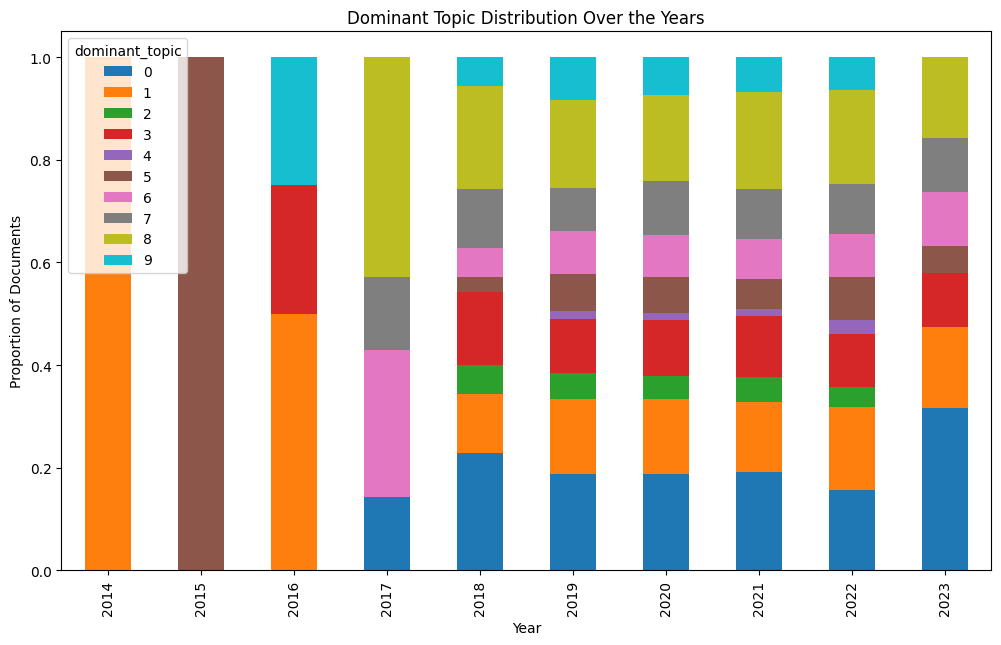

In [39]:
# Plotting the dominant topic distribution over the years
yearly_topic_distribution.plot(kind='bar', stacked=True, figsize=(12, 7))
plt.title('Dominant Topic Distribution Over the Years')
plt.xlabel('Year')
plt.ylabel('Proportion of Documents')
plt.show()

In [40]:
# Merging top_10_tickers with sentiment and topic information
top_10_benchmarking = top_10_tickers.merge(df.groupby('ticker')[['vader_compound', 'blob_polarity', 'dominant_topic']].mean().reset_index(), on='ticker')

In [41]:
# Displaying the benchmarking of Top 10 Tickers (Average Sentiment and Dominant Topic)
display(top_10_benchmarking)

,ticker,e_score,s_score,g_score,total_score,vader_compound,blob_polarity,dominant_topic
0,CTRA,23.420000,14.010000,9.070000,46.510000,1.000000,0.066898,1.000000
1,EOG,22.786667,12.136667,8.183333,43.133333,1.000000,0.080634,1.000000
2,CVX,19.837500,11.260000,10.200000,41.282500,1.000000,0.076498,1.000000
3,TSN,14.295000,14.220000,12.735000,41.115000,1.000000,0.067947,2.000000
4,PCG,7.872500,25.235000,7.757500,40.770000,1.000000,0.084573,1.000000
5,PXD,20.495000,10.727500,9.097500,40.207500,1.000000,0.092712,1.000000
6,EQT,20.873333,9.126667,8.386667,39.020000,0.501533,0.037431,1.333333
7,TDG,12.840000,17.850000,8.290000,38.980000,1.000000,0.100261,5.000000
8,APA,21.980000,8.880000,7.960000,38.810000,1.000000,0.069444,1.000000
9,TXT,10.420000,19.252500,7.332500,37.195000,1.000000,0.122294,5.000000


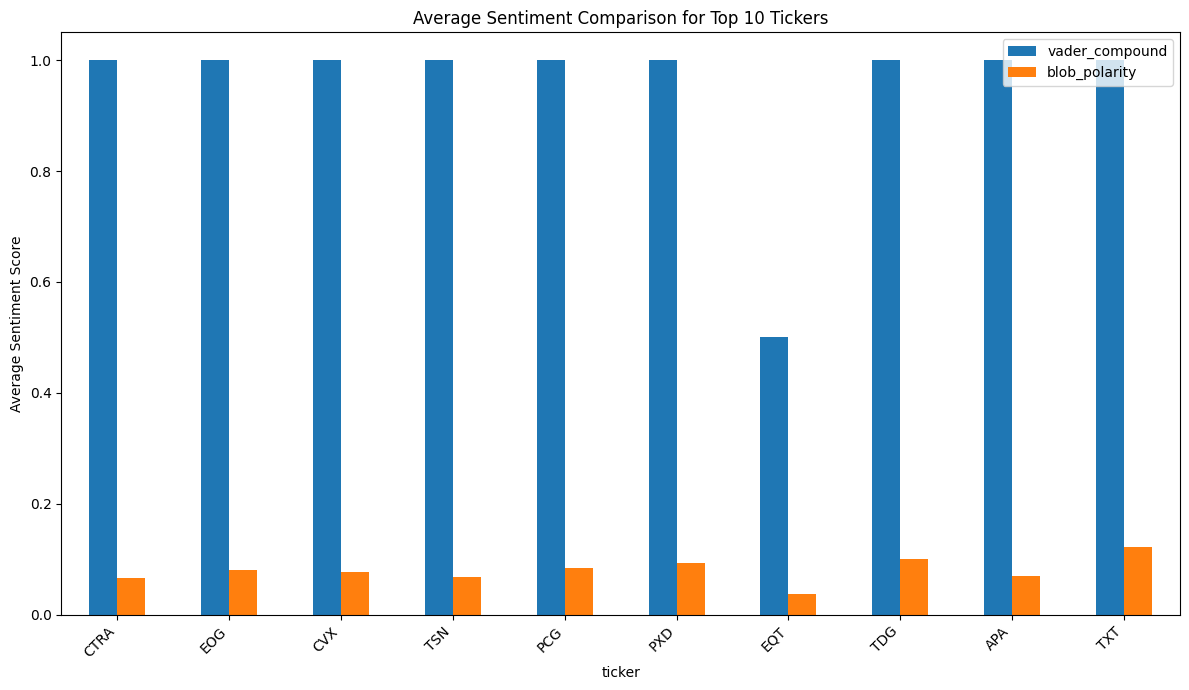

In [42]:
# Visualising sentiment comparison for top 10 tickers
top_10_benchmarking[['ticker', 'vader_compound', 'blob_polarity']].plot(x='ticker', kind='bar', figsize=(12, 7))
plt.title('Average Sentiment Comparison for Top 10 Tickers')
plt.ylabel('Average Sentiment Score')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

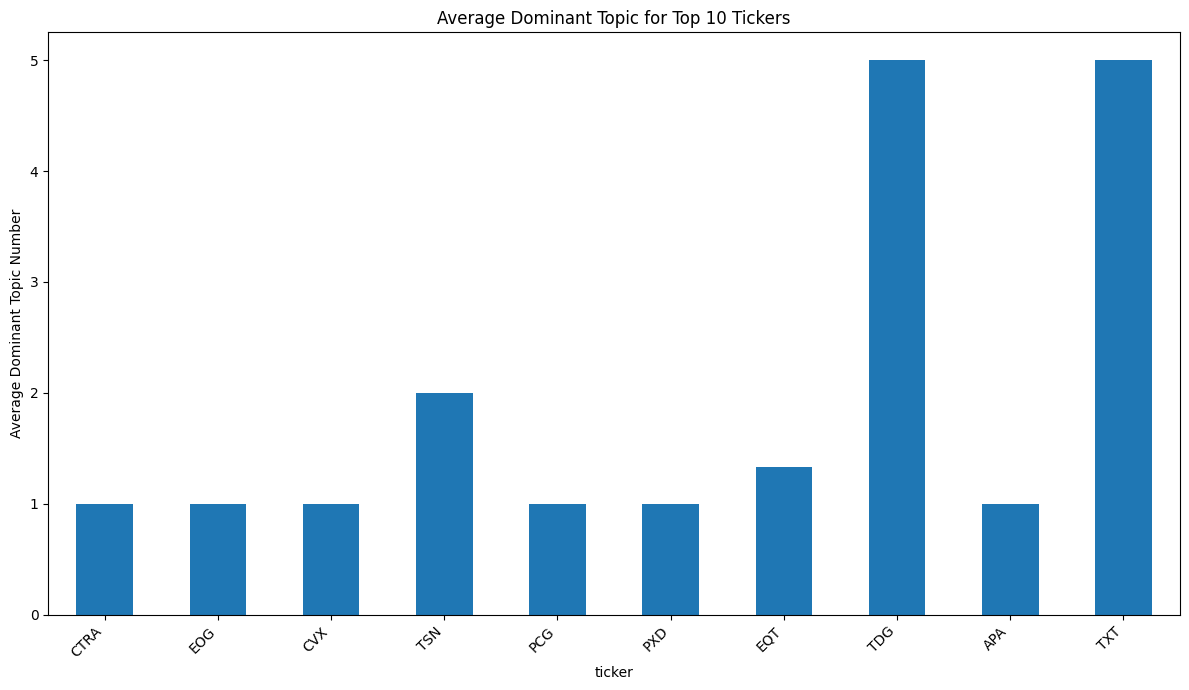

In [43]:
# Visualize dominant topic distribution for top 10 tickers
top_10_benchmarking[['ticker', 'dominant_topic']].plot(x='ticker', kind='bar', figsize=(12, 7), legend=False)
plt.title('Average Dominant Topic for Top 10 Tickers')
plt.ylabel('Average Dominant Topic Number')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()